In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
columnNames= [
    'id number',
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses',
    'Class']                        
#(2 for benign, 4 for malignant)

In [3]:
df =  pd.read_csv('breast-cancer-wisconsin.data.txt', header= None, names= columnNames)

In [4]:
df.head()

,id number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                      699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
# Voy a sustituir los valores ? con la moda para no descartar el paciente.
df['Bare Nuclei'].replace('?', 1, inplace= True)
df['Bare Nuclei']= df['Bare Nuclei'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id number                      699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


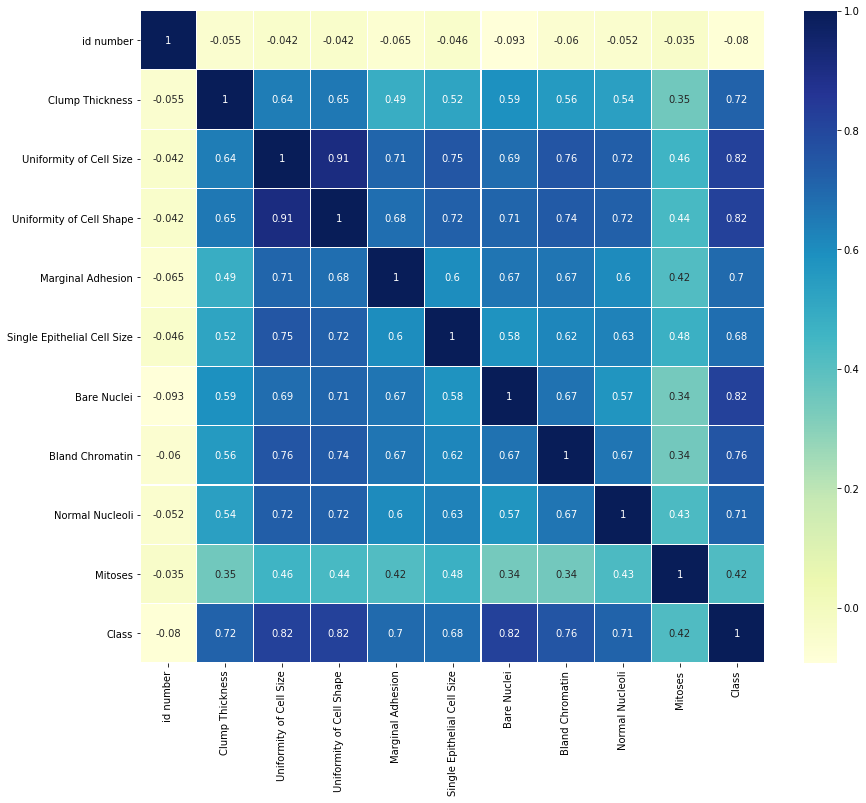

In [19]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [20]:
X=df.drop(['id number', 'Class'], axis=1)
y=df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
knClf= KNeighborsClassifier()
knClf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
y_predict= knClf.predict(X_test)

In [55]:
confusion_matrix(y_test, y_predict)

array([[92,  1],
       [ 2, 45]])

In [53]:
accuracy_score(y_test, y_predict)

0.9785714285714285

In [81]:
#Pasar la serie al formato necesario de array para predict.
sujetoBenigno= X_test.iloc[2].values.reshape(1, -1)
sujeto

array([[2, 1, 1, 1, 2, 1, 2, 1, 1]])

In [82]:
sujetoMaligno= [[5,4,4,5,7,10,3,2,1]]

In [84]:
value_predict= knClf.predict(sujetoMaligno)
value_predict

array([4])

In [ ]:
'''
Ideas de 10 classifier showdown
'''

In [51]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, gamma='scale'),
    NuSVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [52]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

'''
* Accuracy is the count of predictions where your predicted value equals the actual value. 
Accuracy is not always a good indicator because of its yes or no nature.
* Log Loss takes into account the uncertainty of your prediction based on 
how much it varies from the actual label. 
This gives us a more nuanced view into the performance of our model.
'''
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    y_predict = clf.predict(X_test)
    acc = accuracy_score(y_test, y_predict)
    print("Accuracy: {:.4%}".format(acc))
    
    y_predict = clf.predict_proba(X_test)
    ll = log_loss(y_test, y_predict)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 97.8571%
Log Loss: 0.5186353980509899
SVC
****Results****
Accuracy: 97.8571%
Log Loss: 0.09986171276698848
NuSVC
****Results****
Accuracy: 97.8571%
Log Loss: 0.09945913203346839
DecisionTreeClassifier
****Results****
Accuracy: 94.2857%
Log Loss: 1.9736443654234685
RandomForestClassifier
****Results****
Accuracy: 97.8571%
Log Loss: 0.3136687130968523
AdaBoostClassifier
****Results****
Accuracy: 97.1429%
Log Loss: 0.4867652372537474
GradientBoostingClassifier
****Results****
Accuracy: 97.8571%
Log Loss: 0.10650292024026725
GaussianNB
****Results****
Accuracy: 97.1429%
Log Loss: 0.9868232243370073
LinearDiscriminantAnalysis
****Results****
Accuracy: 96.4286%
Log Loss: 0.17696096307966336
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 97.1429%
Log Loss: 0.9539650117141331


In [53]:
#SVC tiene mejor Accuracy con menos Log Loss

In [67]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [71]:
cm= confusion_matrix(y_test, y_predict)
labels=['Benigno', 'Maligno']

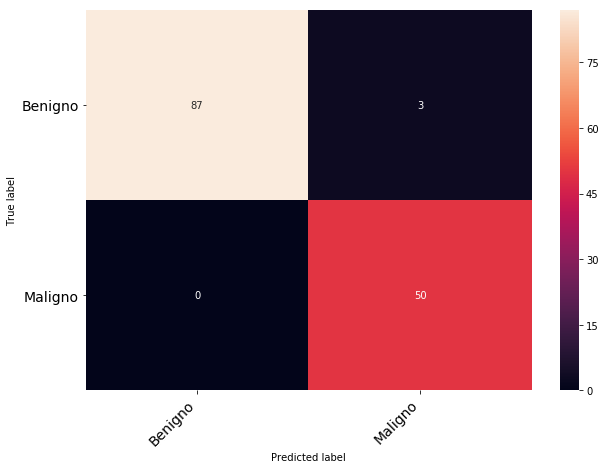

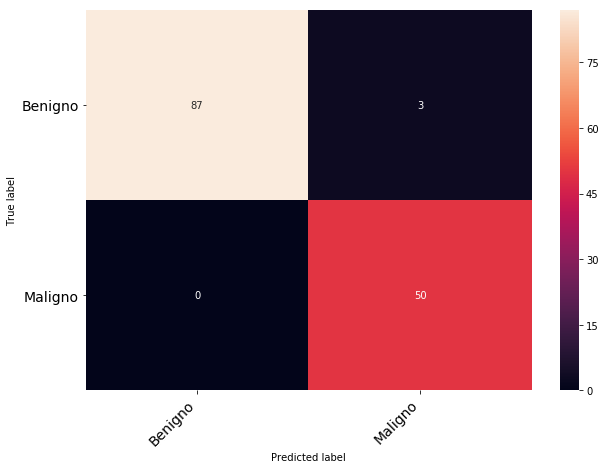

In [73]:
print_confusion_matrix(cm,labels)